In [5]:
from iminuit import cost, Minuit
# faster than scipy.stats functions
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mvnorm
import scipy

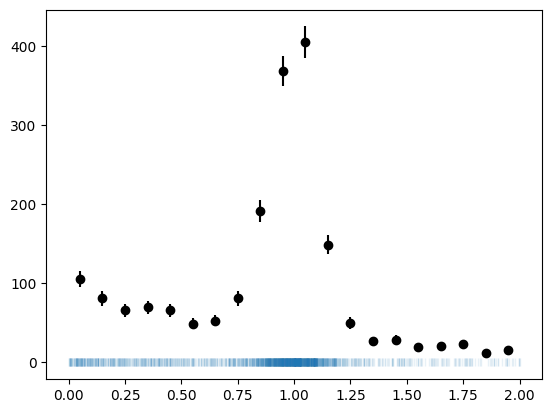

In [6]:
xr = (0, 2)  # xrange

rng = np.random.default_rng(1)

xdata = rng.normal(1, 0.1, size=1000)
ydata = rng.exponential(size=len(xdata))
xmix = np.append(xdata, ydata)
xmix = xmix[(xr[0] < xmix) & (xmix < xr[1])]

n, xe = np.histogram(xmix, bins=20, range=xr)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xmix, np.zeros_like(xmix), "|", alpha=0.1);(1)

def model(x, a, b):
    return a + b * x

truth = (1., 2.)
x = np.linspace(0, 1)
ym = model(x, *truth)
ye = 0.1
y = rng.normal(ym, ye)

c = cost.LeastSquares(x, y, ye, model)

m = Minuit(c, *truth)

In [9]:
c = cost.UnbinnedNLL(xmix, scipy.stats.norm.pdf(x))

m = Minuit(c, z=0.4, mu=0.1, sigma=0.2, tau=2)
m.limits["z"] = (0, 1)
m.limits["sigma", "tau"] = (0, None)
m.migrad()

TypeError: array([0.39894228, 0.39885921, 0.39861011, 0.39819528, 0.39761524,
       0.39687072, 0.39596264, 0.39489214, 0.39366054, 0.39226937,
       0.39072035, 0.38901539, 0.38715659, 0.38514623, 0.38298676,
       0.38068082, 0.37823119, 0.37564085, 0.37291289, 0.37005059,
       0.36705736, 0.36393672, 0.36069236, 0.35732807, 0.35384775,
       0.35025541, 0.34655518, 0.34275126, 0.33884794, 0.33484957,
       0.3307606 , 0.3265855 , 0.32232884, 0.31799518, 0.31358916,
       0.30911541, 0.30457861, 0.29998342, 0.29533453, 0.29063661,
       0.28589432, 0.28111231, 0.27629519, 0.27144753, 0.26657387,
       0.26167871, 0.25676648, 0.25184154, 0.24690821, 0.24197072]) is not a callable object